<a href="https://colab.research.google.com/github/pasumarthi/EVA/blob/master/Session7/Assignment_7b_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential, Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout, Concatenate, GlobalAveragePooling2D, Input,Lambda
from keras.layers.advanced_activations import ReLU, Softmax
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
import keras

Using TensorFlow backend.


In [2]:
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  y_train = keras.utils.to_categorical(y_train, 10)
  y_test  = keras.utils.to_categorical(y_test, 10)
  x_train = x_train.astype('float32')
  x_test  = x_test.astype('float32')

170500096/170498071 [==============================] - 9s 0us/step


NameError: ignored

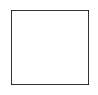

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
def space_to_depth_bs2(x):
  return tf.space_to_depth(x, block_size=2)

def space_to_depth_bs4(x):
  return tf.space_to_depth(x, block_size=4)

In [7]:
## MAIN BLOCK
from keras.layers import Activation


x1 = Input(shape=(32,32,3))


x2=SeparableConv2D(16, (5,5), padding='same',  use_bias=False)(x1)#32
x2 = ReLU()(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0.2)(x2)

x3 = Conv2D(32, (5,5), padding='same', use_bias=False)(x2)#32
x3 = ReLU()(x3)
x3 = BatchNormalization()(x3)
x3 = Dropout(0.2)(x3)

x4 = Conv2D(64, (5,5), padding='same', use_bias=False)(x3)#32
x4 = ReLU()(x4)
x4 = BatchNormalization()(x4)
x4 = Dropout(0.2)(x4)


x4_x5= Concatenate(axis=-1)([x4,x2])
x5=SeparableConv2D(64, (5,5), padding='same',  use_bias=False)(x4_x5)#32
x5 = ReLU()(x2)
x5 = BatchNormalization()(x5)
x5 = Dropout(0.5)(x5)

##block2
x2_block2 = Lambda(space_to_depth_bs2)(x2)
x3_block2 = Lambda(space_to_depth_bs2)(x3)
x4_block2 = Lambda(space_to_depth_bs2)(x4)
x5_block2 = Lambda(space_to_depth_bs2)(x5)



x5 = Conv2D(32, (1,1), padding='same', use_bias=False)(x5)#32
x2_x5= Concatenate(axis=-1)([x2,x5])
#x2_x5 = Conv2D(32, (1,1), padding='same', use_bias=False)(x2_x5)#32
x6 =  MaxPooling2D(pool_size=(2, 2))(x2_x5) #16

x7=SeparableConv2D(32, (3,3), padding='same',  use_bias=False)(x6)#16
x7 = ReLU()(x7)
x7 = BatchNormalization()(x7)
x7 = Dropout(0.5)(x7)

x2_x5_x7=Concatenate(axis=-1)([x2_block2,x5_block2,x7])
x8= Conv2D(64, (5,5), padding='same', use_bias=False)(x2_x5_x7)#16
x8 = ReLU()(x8)
x8 = BatchNormalization()(x8)
x8 = Dropout(0.3)(x8)

x8_x4_x5_x7=Concatenate(axis=-1)([x8,x4_block2,x5_block2,x7])
x9=SeparableConv2D(64, (3,3), padding='same',  use_bias=False)(x8_x4_x5_x7)#16
x9 = ReLU()(x9)
x9 = BatchNormalization()(x9)

x9_x8_x7_x5_x4_x2=Concatenate(axis=-1)([x2_block2,x4_block2,x5_block2,x7,x8,x9])
x10=SeparableConv2D(64, (5,5), padding='same',  use_bias=False)(x9_x8_x7_x5_x4_x2)#
x10 = ReLU()(x10)
x10 = BatchNormalization()(x10)
x10 = Dropout(0.5)(x10)


x10 = Conv2D(16, (1,1), padding='same', use_bias=False)(x10)
x10_x9_x7_x5_x2=Concatenate(axis=-1)([x2_block2,x5_block2,x7,x9,x10])

#x10_x9_x7_x5_x2 = Conv2D(16, (1,1), padding='same', use_bias=False)(x10_x9_x7_x5_x2)
x11=MaxPooling2D(pool_size=(2, 2))(x10_x9_x7_x5_x2)#8
## block3
x2_block3 = Lambda(space_to_depth_bs4)(x2)
x3_block3 = Lambda(space_to_depth_bs4)(x3)
x4_block3 = Lambda(space_to_depth_bs4)(x4)
x5_block3 = Lambda(space_to_depth_bs4)(x5)

x7_block3 = Lambda(space_to_depth_bs2)(x7)
x8_block3 = Lambda(space_to_depth_bs2)(x8)
x9_block3 = Lambda(space_to_depth_bs2)(x9)
x10_block3 = Lambda(space_to_depth_bs2)(x10)


x11_x8=Concatenate(axis=-1)([x8_block3,x11])
x12=Conv2D(32, (5,5), padding='same', use_bias=False)(x11_x8)#8
x12 = ReLU()(x12)
x12 = BatchNormalization()(x12)
x12 = Dropout(0.3)(x12)

x12_x9_x5_x3=Concatenate(axis=-1)([x3_block3,x5_block3,x9_block3,x12])
x13=SeparableConv2D(32, (5,5), padding='same',  use_bias=False)(x12_x9_x5_x3)#
x13 = ReLU()(x13)
x13 = BatchNormalization()(x13)
x13 = Dropout(0.5)(x13)

x13_x12_x7_x4_x3=Concatenate(axis=-1)([x3_block3,x4_block3,x7_block3,x12,x13])
x14=Conv2D(64, (5,5), padding='same', use_bias=False)(x13_x12_x7_x4_x3)#8
x14 = ReLU()(x14)
x14 = BatchNormalization()(x14)
x14 = Dropout(0.5)(x14)

x14_x13_x9_x7_x5_x4_x2=Concatenate(axis=-1)([x2_block3,x4_block3,x5_block3,x7_block3,x9_block3,x13,x14])
x15=SeparableConv2D(128, (5,5), padding='same',  use_bias=False)(x14_x13_x9_x7_x5_x4_x2)#8
x15 = ReLU()(x15)



x15_x13_x9_x5=Concatenate(axis=-1)([x5_block3,x9_block3,x13,x15])


"""reduce_ch = Conv2D(10, (1,1), use_bias=False)(x15_x13_x9_x5)#8
avg_pool = GlobalAveragePooling2D()(reduce_ch)
output = Softmax()(avg_pool)
"""
reduce_ch = Conv2D(10, (8,8), use_bias=False)(x15_x13_x9_x5)#8
x16 = Flatten()(reduce_ch)
output = Softmax()(x16)


model = Model(inputs=[x1], outputs=[output])

#print(datetime.datetime.now())

W0615 23:06:10.516012 140514709612416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0615 23:06:10.551638 140514709612416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 23:06:10.559758 140514709612416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0615 23:06:10.604554 140514709612416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0615 23:06:10.605465 1405147096

In [8]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_1 (SeparableCo (None, 32, 32, 16)   123         input_1[0][0]                    
__________________________________________________________________________________________________
re_lu_1 (ReLU)                  (None, 32, 32, 16)   0           separable_conv2d_1[0][0]         
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          re_lu_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch):
  if (epoch <= 3 ):
   return 0.003
  elif(epoch <=6):
   return 0.002
  elif(epoch <=9):
   return 0.001
  elif(epoch <=13):
   return 0.0005 
  else: 
   return round(0.001 * 1/(1 + 0.319 * epoch), 10)



W0615 23:07:52.120324 140514709612416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0615 23:07:52.682009 140514709612416 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
391/391 [==============================] - 62s 159ms/step - loss: 2.9178 - acc: 0.3722 - val_loss: 1.5204 - val_acc: 0.4877
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.003.
391/391 [==============================] - 54s 138ms/step - loss: 1.6503 - acc: 0.4987 - val_loss: 1.5863 - val_acc: 0.4818
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.003.
391/391 [==============================] - 54s 138ms/step - loss: 1.3682 - acc: 0.5695 - val_loss: 1.2332 - val_acc: 0.5783
Epoch 4/100

Epoch 00004: LearningRateScheduler setting learning rate to 0.003.
391/391 [==============================] - 54s 138ms/step - loss: 1.2570 - acc: 0.6069 - val_loss: 1.2347 - val_acc: 0.5769
Epoch 5/100

Epoch 00005: LearningRateScheduler setting learning rate to 0.002.
391/391 [==============================] - 54s 138ms/step - loss: 1.2589 - acc: 0.6195 - val_loss: 1.283

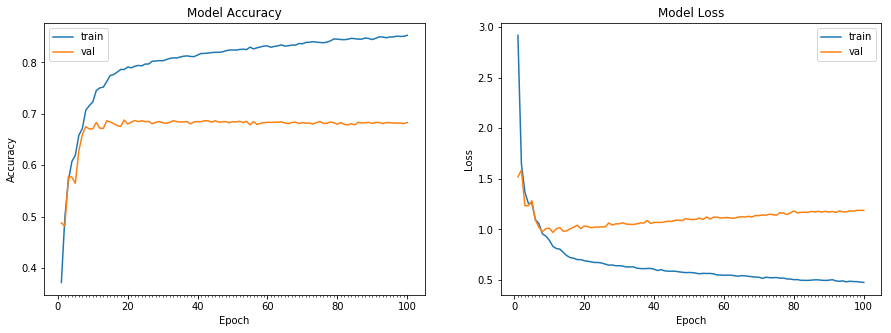

NameError: ignored

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#datagen   = ImageDataGenerator(horizontal_flip=True,width_shift_range=0.125,height_shift_range=0.125)
datagen = ImageDataGenerator(zoom_range=0.0,horizontal_flip=False)
datagen.fit(x_train)
train_iterator = datagen.flow(x_train, y_train, batch_size=128)
test_iterator = datagen.flow(x_test, y_test, batch_size=128)

lr1=LearningRateScheduler(scheduler, verbose=1)
start = time.time()
model_info= model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=100, verbose=1, validation_data=test_iterator,
                   validation_steps=len(test_iterator),callbacks=[lr1])
end = time.time()
print ("Model took %0.2f seconds to train" %(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))



